In [759]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [760]:
df_all = pd.read_csv('laptops.csv')

In [761]:
df_all.columns = df_all.columns.str.lower().str.replace(' ','_')
df_all.head()
base = ['ram', 'storage', 'screen', 'final_price']
df = df_all[base]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [762]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df[base]
    print(df_num.head())
    df_num = df_num.fillna(df_num['screen'].mean())
    print(df_num.head())
    X = df_num.values
    return X

In [763]:
# df = df_all[['ram','storage','screen','final_price']]
X = prepare_X(df_all)
Xmean = prepare_X_mean(df)
df_long_tail = df
X

   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01
   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01


array([[   8.  ,  512.  ,   15.6 , 1009.  ],
       [   8.  ,  256.  ,   15.6 ,  299.  ],
       [   8.  ,  256.  ,   15.6 ,  789.  ],
       ...,
       [  32.  , 1000.  ,   17.3 , 3399.99],
       [  16.  , 1000.  ,   13.4 , 1899.99],
       [  16.  ,  256.  ,   13.4 , 1699.99]])

<Axes: xlabel='final_price', ylabel='Count'>

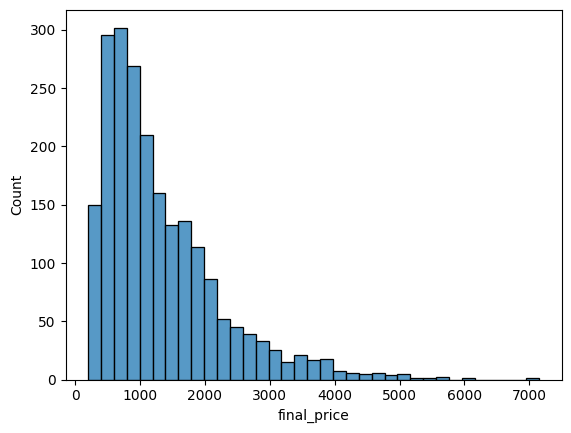

In [764]:
sns.histplot(df_long_tail.final_price, bins = 35)

<Axes: xlabel='final_price', ylabel='Count'>

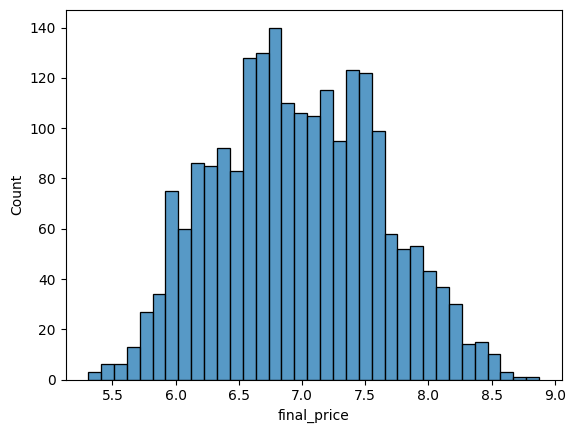

In [765]:
df = np.log1p(df)
sns.histplot(df.final_price, bins = 35)

In [766]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [767]:
df_long_tail['ram'].median()

np.float64(16.0)

In [768]:
idx = np.arange(len(df))

np.random.seed(9)
np.random.shuffle(idx)

In [769]:
n = len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

In [770]:
n_val, n_test, n_train

(432, 432, 1296)

In [771]:
n_train
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

# df_trainmean = dfmean.iloc[idx[:n_train]]
# df_valmean = dfmean.iloc[idx[n_train:n_train + n_val]]
# df_testmean = dfmean.iloc[idx[n_train + n_val:]]

In [772]:
df.iloc[idx[:10]]


,ram,storage,screen,final_price
916,2.833213,6.908755,2.809403,7.937732
2016,3.496508,6.908755,2.809403,7.158070
332,2.197225,5.549076,2.791165,7.377759
1260,2.833213,6.240276,2.833213,7.465146
1838,2.197225,5.484797,2.708050,6.214608
1848,2.197225,5.549076,2.809403,6.060501
1567,2.833213,6.240276,2.833213,7.732808
804,2.833213,6.908755,2.809403,7.749322
2017,3.496508,6.908755,2.809403,7.220623
692,3.496508,6.908755,2.890372,8.070909


In [773]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [774]:
df_train_withtarg = df_train.reset_index(drop=True)
df_val_withtarg = df_val.reset_index(drop=True)
df_test_withtarg = df_test.reset_index(drop=True)

In [775]:
y_train = np.log1p(df_train_withtarg.final_price.values)
y_val = np.log1p(df_val_withtarg.final_price.values)
y_test = np.log1p(df_test_withtarg.final_price.values)

In [776]:
# don't give away the answers
del df_train_withtarg['final_price']
del df_val_withtarg['final_price']
del df_test_withtarg['final_price']

In [777]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [778]:
X_train = df_train_withtarg.values
X_train

array([[2.83321334, 6.90875478, 2.8094027 ],
       [3.49650756, 6.90875478, 2.8094027 ],
       [2.19722458, 5.54907608, 2.79116511],
       ...,
       [2.83321334, 6.90875478, 2.66722821],
       [2.83321334, 6.90875478, 2.7080502 ],
       [2.83321334, 6.24027585, 2.8094027 ]])

In [779]:
X_train = df_train.fillna(0).values
# X_train_0 = prepare_X(df_train)
X_train_avg = df_train.fillna(df_train['screen'].mean()).values
# X_train_avg = prepare_X_mean(df_train)
# df_train['screen'].mode()

In [780]:
w0 , w = train_linear_regression(X_train, y_train)
w0avg , wavg = train_linear_regression(X_train_avg, y_train)

In [781]:
y_pred = w0 + X_train.dot(w)
y_pred_avg = w0avg + X_train.dot(wavg)
y_pred


array([2.19487013, 2.09574152, 2.12341988, ..., 2.14632671, 2.15144244,
       2.04092642])

In [782]:
y_pred_avg

array([2.1947835 , 2.09593179, 2.12294112, ..., 2.14724414, 2.15208499,
       2.0408285 ])

<Axes: ylabel='Count'>

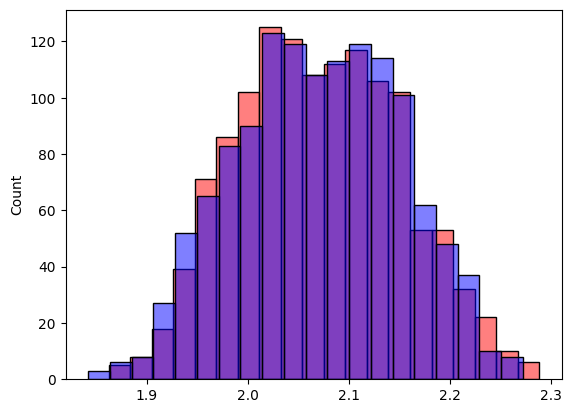

In [783]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

<Axes: ylabel='Count'>

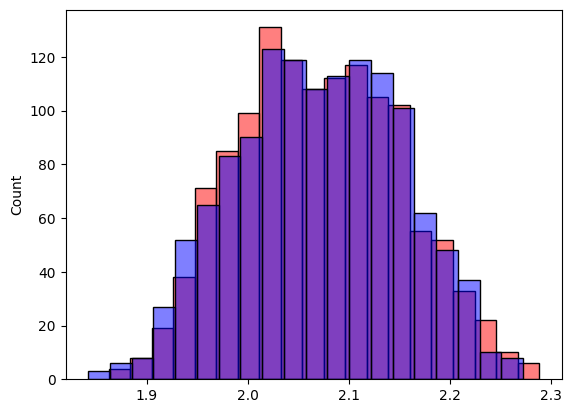

In [784]:
sns.histplot(y_pred_avg, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

In [785]:
def rmse(y, y_pred):
    error = y - y_pred
    # print(error)
    se = error ** 2
    # print(se)
    mse = np.nanmean(se)
    # print(mse)
    # print(np.sqrt(mse))
    return np.sqrt(mse)

zerores = rmse(y_train, y_pred)
zerores

np.float64(0.0037694493001644504)

In [786]:
meanres = rmse(y_train, y_pred_avg)
meanres

np.float64(0.003894073448418232)

In [787]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, round(score,2))

0 1.1956248100366496 0.0
0.01 1.1913238104723711 0.0
0.1 1.1540601286386603 0.0
1 0.8844844456907897 0.01
5 0.4600667332047089 0.03
10 0.30757920895036683 0.03
100 0.08504290454934732 0.06


In [788]:
X_val = df_val.fillna(0).values
# y_val = np.log1p(df_val_withtarg.final_price.values)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
w0, w = train_linear_regression(X_val, y_pred)
# w0 , w = train_linear_regression(X_train, y_train)

# print(w0, w)
print(r, w0, round(score,2))

100 0.08504290455088959 0.06


In [789]:
scores = [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.06, 0.07]

print(round(np.std(scores),3))

0.005


In [798]:
df_train_val = pd.concat([df_train, df_val])

# X = prepare_X(df_train_val)

# train_linear_regression_reg(X, y_pred, r=0.001)

X_train_val = prepare_X(df_train_val)
y_train_val = np.log1p(df_train_val.final_price.values)
_r = 0.001
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=_r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_val, y_pred)

print(_r, w0, round(score,2))


0.001 1.1970565515672265 0.12
